In [677]:
import json
import pandas as pd
import numpy as np


In [678]:
business_list = []
with open('business.json', 'r') as f:
    for cnt, line in enumerate(f):
        try:
            line = line.strip('\n').strip(',')
#            json_obj = json.loads(line)
            business_list.append(json.loads(line))
        except Exception as e:
            print(e)
            continue
business = pd.DataFrame(business_list)

In [679]:
len(business)#total length 

192609

In [680]:
business = business[(business['categories'].isnull() ==False)&(business['is_open']==1)&(business['review_count']>10)]
len(business)

72677

In [681]:
ice= business[business['categories'].str.contains('Ice Cream')]
len(ice)


1294

In [682]:
ice = ice[(ice['city']=='Pittsburgh')|(ice['city']=='Charlotte')|
                    (ice['city']=='Urbana')|(ice['city']=='Phoenix')|(ice['city']=='Las Vegas')|
                    (ice['city']=='Madison')|(ice['city']=='Cleveland')]
len(ice)


455

In [683]:
ice.groupby('city').size()

city
Charlotte      57
Cleveland      24
Las Vegas     173
Madison        28
Phoenix       118
Pittsburgh     51
Urbana          4
dtype: int64

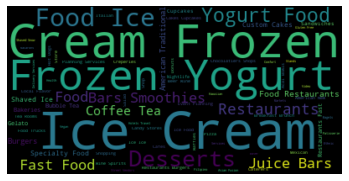

In [684]:
from os import path 
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt


text = ' '.join(ice['categories']) 

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [685]:
ice.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
411,7800 Fairview Rd,"{'WiFi': ''no'', 'BusinessAcceptsCreditCards':...",nwxF9EKLOCpkScMF2utHDw,"Ice Cream & Frozen Yogurt, Food, Event Plannin...",Charlotte,"{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...",1,35.147358,-80.809568,Ben & Jerry's,28226,19,3.5,NC
460,115 Meyran Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",O-fYUqXjkwNvRfFnlUH6Iw,"Bakeries, Event Planning & Services, Caterers,...",Pittsburgh,"{'Monday': '9:0-3:0', 'Tuesday': '9:0-3:0', 'W...",1,40.440959,-79.958608,Insomnia Cookies,15213,18,3.0,PA
1807,2362 Professor Ave,"{'BusinessParking': '{'garage': False, 'street...",GhOWffUr9yDBxB5Ceqzc_Q,"Food, Ice Cream & Frozen Yogurt",Cleveland,"{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",1,41.480032,-81.685488,Tremont Scoops,44113,89,4.0,OH
1897,10965 Lavender Hill Dr,"{'BikeParking': 'True', 'WiFi': 'u'no'', 'Busi...",I8T4Xsp3Wv7W-RJhsHrTDA,"Ice Cream & Frozen Yogurt, Food",Las Vegas,"{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",1,36.144869,-115.333094,Menchie's Frozen Yogurt,89135,49,3.5,NV
1969,4845 S Fort Apache Rd,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...",iX2c4IzH_L5F6FM5GD3SUQ,"Restaurants, Desserts, Food, Juice Bars & Smoo...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",1,36.101690,-115.298150,Tasty Crepes,89147,260,4.5,NV


In [686]:
ice = ice[(ice['attributes'].isnull() ==False)]
len(ice)

453

In [687]:
n=453

In [688]:
a=ice['attributes'].to_list()
b=[]
for i in range(453):
    c=list(a[i].keys())
    b=b+c



In [689]:
import collections
collections.Counter(b)

Counter({'WiFi': 426,
         'BusinessAcceptsCreditCards': 451,
         'RestaurantsPriceRange2': 448,
         'BusinessParking': 445,
         'BikeParking': 435,
         'RestaurantsTakeOut': 442,
         'Caters': 365,
         'WheelchairAccessible': 127,
         'Alcohol': 167,
         'OutdoorSeating': 188,
         'RestaurantsAttire': 156,
         'Ambience': 152,
         'RestaurantsDelivery': 207,
         'HasTV': 152,
         'GoodForMeal': 133,
         'RestaurantsReservations': 162,
         'GoodForKids': 163,
         'NoiseLevel': 129,
         'RestaurantsGoodForGroups': 157,
         'BusinessAcceptsBitcoin': 78,
         'ByAppointmentOnly': 21,
         'RestaurantsTableService': 85,
         'DriveThru': 45,
         'DogsAllowed': 62,
         'GoodForDancing': 3,
         'BYOBCorkage': 5,
         'Smoking': 4,
         'HappyHour': 3,
         'CoatCheck': 2,
         'Music': 2,
         'BestNights': 2,
         'DietaryRestrictions': 1})

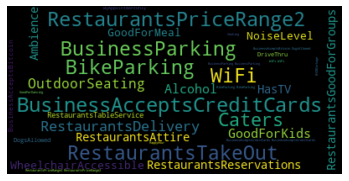

In [690]:
text = ' '.join(b) 

wordcloud3 = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

In [691]:
att_list=list(set(b))
len(att_list)

32

In [692]:
for j in range(32):
    v=[]
    for i in range(453):
        vv=a[i].get(att_list[j],'No info')
        v.append(vv)
    ice[att_list[j]]=v


In [693]:
ice.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,DriveThru,GoodForDancing,RestaurantsTableService,BikeParking,WheelchairAccessible,Smoking,CoatCheck,RestaurantsReservations,HappyHour,RestaurantsAttire
411,7800 Fairview Rd,"{'WiFi': ''no'', 'BusinessAcceptsCreditCards':...",nwxF9EKLOCpkScMF2utHDw,"Ice Cream & Frozen Yogurt, Food, Event Plannin...",Charlotte,"{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...",1,35.147358,-80.809568,Ben & Jerry's,...,No info,No info,No info,True,No info,No info,No info,No info,No info,No info
460,115 Meyran Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",O-fYUqXjkwNvRfFnlUH6Iw,"Bakeries, Event Planning & Services, Caterers,...",Pittsburgh,"{'Monday': '9:0-3:0', 'Tuesday': '9:0-3:0', 'W...",1,40.440959,-79.958608,Insomnia Cookies,...,No info,No info,No info,True,No info,No info,No info,No info,No info,No info
1807,2362 Professor Ave,"{'BusinessParking': '{'garage': False, 'street...",GhOWffUr9yDBxB5Ceqzc_Q,"Food, Ice Cream & Frozen Yogurt",Cleveland,"{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",1,41.480032,-81.685488,Tremont Scoops,...,No info,No info,No info,True,No info,No info,No info,No info,No info,No info
1897,10965 Lavender Hill Dr,"{'BikeParking': 'True', 'WiFi': 'u'no'', 'Busi...",I8T4Xsp3Wv7W-RJhsHrTDA,"Ice Cream & Frozen Yogurt, Food",Las Vegas,"{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",1,36.144869,-115.333094,Menchie's Frozen Yogurt,...,No info,No info,No info,True,True,No info,No info,No info,No info,No info
1969,4845 S Fort Apache Rd,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...",iX2c4IzH_L5F6FM5GD3SUQ,"Restaurants, Desserts, Food, Juice Bars & Smoo...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",1,36.101690,-115.298150,Tasty Crepes,...,No info,No info,No info,True,No info,No info,No info,False,No info,'casual'


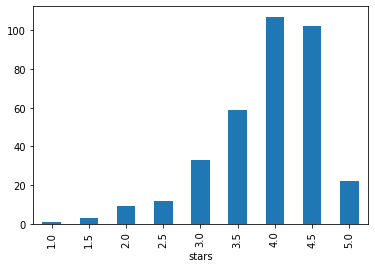

In [694]:
import collections
collections.Counter(ice['stars'])
ice.groupby('stars')['name'].nunique().plot(kind='bar')
plt.show()

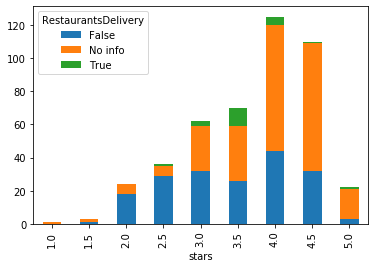

In [695]:
ice.groupby(['stars','RestaurantsDelivery']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

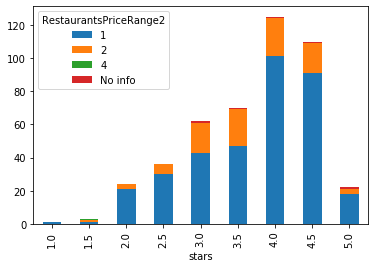

In [696]:
ice.groupby(['stars','RestaurantsPriceRange2']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [697]:
collections.Counter(ice['WiFi'])

Counter({"'no'": 151,
         "u'no'": 105,
         "'free'": 77,
         "u'free'": 90,
         'No info': 27,
         "u'paid'": 2,
         "'paid'": 1})

In [698]:
nowifi=[i for i in range(453) if list(ice['WiFi'])[i]=="'no'"]+[i for i in range(453) if list(ice['WiFi'])[i]=="u'no'"]
freewifi=[i for i in range(453) if list(ice['WiFi'])[i]=="'free'"]+[i for i in range(453) if list(ice['WiFi'])[i]=="u'free'"]
paidwifi=[i for i in range(453) if list(ice['WiFi'])[i]=="'paid'"]+[i for i in range(453) if list(ice['WiFi'])[i]=="u'paid'"]

In [699]:
for i in range(n):
    if i in nowifi:
        v[i]='No wifi'
    elif i in freewifi:
        v[i]='Free wifi'
    elif i in paidwifi:
        v[i]="Paid wifi"
    else:
        v[i]="No info"
ice['WiFi']=v

In [700]:
collections.Counter(ice["WiFi"])

Counter({'No wifi': 256, 'Free wifi': 167, 'No info': 27, 'Paid wifi': 3})

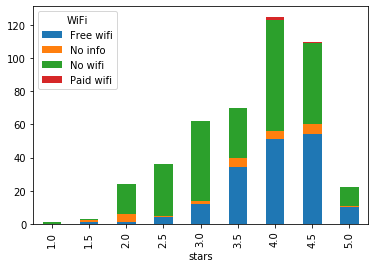

In [701]:
ice.groupby(['stars','WiFi']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

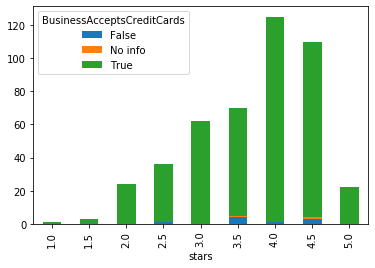

In [702]:
ice.groupby(['stars','BusinessAcceptsCreditCards']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [704]:
bp=ice['BusinessParking'].to_list()
nobp=[i for i in range(453) if bp[i] == 'No info'] +[i for i in range(453) if bp[i] == 'None'] 


In [705]:
import ast
for i in range(453):
    if i in nobp:
        v[i]='No info'
    else:
        v[i]=ast.literal_eval(bp[i]).get('garage',"")
ice['garage']=v


In [706]:
for i in range(453):
    if i in nobp:
        v[i]='No info'
    else:
        v[i]=ast.literal_eval(bp[i]).get('street',"")
ice['street']=v
for i in range(453):
    if i in nobp:
        v[i]='No info'
    else:
        v[i]=ast.literal_eval(bp[i]).get('validated',"")
ice['validated']=v
for i in range(453):
    if i in nobp:
        v[i]='No info'
    else:
        v[i]=ast.literal_eval(bp[i]).get('lot',"")
ice['lot']=v
for i in range(453):
    if i in nobp:
        v[i]='No info'
    else:
        v[i]=ast.literal_eval(bp[i]).get('valet',"")
ice['valet']=v

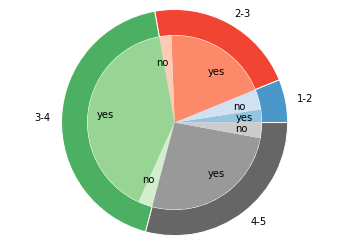

In [707]:
group_names=['1-2', '2-3', '3-4','4-5']
group_size=[28,98,195,132]
subgroup_names=['yes','no','yes','no','yes','no','yes','no']
subgroup_size=[11,17,88,10,183,12,119,13]
a, b, c,d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens,plt.cm.binary]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6),d(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.4), a(0.2), b(0.4), b(0.2), c(0.4), c(0.2),d(0.4), d(0.2)])
plt.margins(0,0)
 
# show it
plt.show()


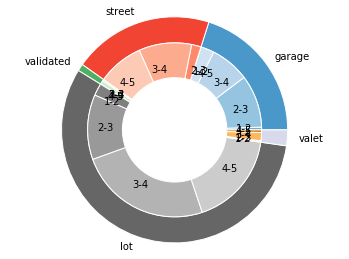

In [708]:
group_names=['garage', 'street', 'validated','lot','valet']
group_size=[80,80,4,225,9]
subgroup_names=['1-2', '2-3', '3-4', '4-5', '1-2', '2-3', '3-4', '4-5','1-2','2-3','3-4','4-5','1-2','2-3','3-4','4-5','1-2','2-3','3-4','4-5']
subgroup_size=[2,39,29,10,0,7,39,34,0,0,1,3,9,48,98,70,0,1,6,2]
a, b, c,d,e=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens,plt.cm.binary,plt.cm.PuOr]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6),d(0.6),e(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3),a(0.2), b(0.5), b(0.4),b(0.3),b(0.2), c(0.5), c(0.4), c(0.3), c(0.2),d(0.5), d(0.4), d(0.3), d(0.2),e(0.5), e(0.4), e(0.3), e(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()



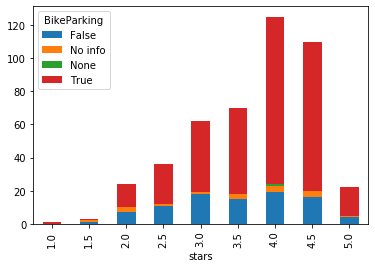

In [709]:
ice.groupby(['stars','BikeParking']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

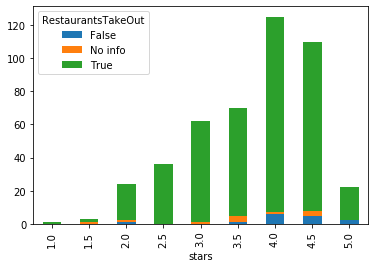

In [710]:
ice.groupby(['stars','RestaurantsTakeOut']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

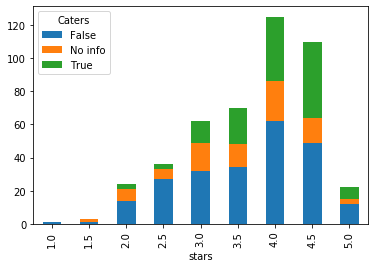

In [711]:
ice.groupby(['stars','Caters']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

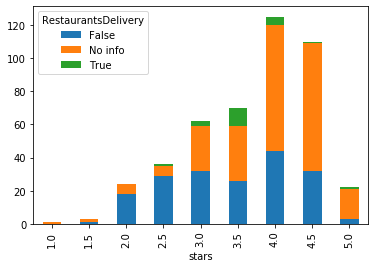

In [712]:
ice.groupby(['stars','RestaurantsDelivery']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [713]:
from scipy import stats
f=[i for i in range(453) if list(ice['WiFi'])[i]=='False']
for i in range(453):
    if i in f:
        v[i]='No info'
    else:
        v[i]=list(ice['WiFi'])[i]
ice['WiFi']=v

wifi_na=(ice[ice['WiFi']=='No info'])['stars']
wifi_a=(ice[ice['WiFi']!='No info'])['stars']
stats.ttest_ind(wifi_na,wifi_a, equal_var = False)
# 27 NA, 426 has info(256 no wifi, 167 free, 3 paid),not significant between if info is provided;
# there is difference between paid and nowifi, but nodifference between paid and free wifi;
# Thus consider paid is the same as free wifi(256 nowifi,170 freewifi)
#random choose 16 nowifi, 11 free wifi to compute NA


for i in range(453):
    if i in f:
        v[i]='Free wifi'
    else:
        v[i]=list(ice['WiFi'])[i]
ice['WiFi']=v
import random
random.seed(123)
f=[i for i in range(453) if list(ice['WiFi'])[i]=='No info']
from random import sample 
nowifiind=sample(f,16)
freewifiind = [ele for ele in f if ele not in nowifiind] 
for i in range(453):
    if i in nowifiind:
        v[i]='No wifi'
    elif i in freewifiind:
        v[i]='Free wifi'
    else:
        v[i]=list(ice['WiFi'])[i]
ice['WiFi']=v

In [714]:
collections.Counter(ice['WiFi'])

Counter({'No wifi': 272, 'Free wifi': 178, 'Paid wifi': 3})

In [715]:
collections.Counter(ice['BusinessAcceptsCreditCards'])

Counter({'True': 442, 'False': 9, 'No info': 2})

In [716]:
#creditcard: 2 NA, 9 false,,442 true,convert na to true.
f=[i for i in range(453) if list(ice['BusinessAcceptsCreditCards'])[i]=='No info']
for i in range(453):
    if i in f:
        v[i]='True'
    else:
        v[i]=list(ice['BusinessAcceptsCreditCards'])[i]
ice['BusinessAcceptsCreditCards']=v

In [717]:
collections.Counter(ice['BusinessAcceptsCreditCards'])

Counter({'True': 444, 'False': 9})

In [718]:
collections.Counter(ice['RestaurantsPriceRange2'])

Counter({'2': 94, 'No info': 5, '1': 353, '4': 1})

In [719]:
# price: 5 NA, 353 1st,94 2nd, 1 4th, convert NA to 1st
f=[i for i in range(453) if list(ice['RestaurantsPriceRange2'])[i]=='No info']
for i in range(453):
    if i in f:
        v[i]='1'
    else:
        v[i]=list(ice['RestaurantsPriceRange2'])[i]
ice['RestaurantsPriceRange2']=v

In [720]:
collections.Counter(ice['RestaurantsPriceRange2'])### combine with review to see if 4th is an outlier

Counter({'2': 94, '1': 358, '4': 1})

In [721]:
collections.Counter(ice['garage'])

Counter({False: 388, True: 50, 'No info': 15})

In [722]:
collections.Counter(ice['street'])

Counter({False: 358, True: 80, 'No info': 15})

In [723]:
collections.Counter(ice['validated'])

Counter({False: 434, 'No info': 15, True: 4})

In [724]:
collections.Counter(ice['lot'])

Counter({True: 226, False: 212, 'No info': 15})

In [725]:
collections.Counter(ice['valet'])

Counter({False: 429, 'No info': 15, True: 9})

In [726]:
havegarage=(ice[ice['garage']==True])['stars']
havestreet=(ice[ice['street']==True])['stars']
havevali=(ice[ice['validated']==True])['stars']
havelot=(ice[ice['lot']==True])['stars']
havevalet=(ice[ice['valet']==True])['stars']
stats.f_oneway(havegarage,havestreet,havevali,havelot,havevalet)

F_onewayResult(statistic=3.707098118946562, pvalue=0.005671292483938297)

In [727]:
havegarage=(ice[ice['garage']==False])['stars']
havestreet=(ice[ice['street']==False])['stars']
havevali=(ice[ice['validated']==False])['stars']
havelot=(ice[ice['lot']==False])['stars']
havevalet=(ice[ice['valet']==False])['stars']
stats.f_oneway(havegarage,havestreet,havevali,havelot,havevalet)

F_onewayResult(statistic=0.5961327415195875, pvalue=0.6654702405072823)

In [728]:
## which kind of parking place is not important
h1=[i for i in range(453) if list(ice['garage'])[i]==True]
h2=[i for i in range(453) if list(ice['street'])[i]==True]
h3=[i for i in range(453) if list(ice['validated'])[i]==True]
h4=[i for i in range(453) if list(ice['lot'])[i]==True]
h5=[i for i in range(453) if list(ice['valet'])[i]==True]
noinfo=[i for i in range(453) if list(ice['garage'])[i]=='No info']
h=h1+h2+h3+h4+h5
for i in range(453):
    if i in h:
        v[i]=1
    elif i in noinfo:
        v[i]='No info'
    else:
        v[i]=0
ice['BusinessParking']=v

In [729]:
collections.Counter(ice['BusinessParking'])


Counter({1: 317, 0: 121, 'No info': 15})

In [730]:
park_na=(ice[ice['BusinessParking']=='No info'])['stars']
park_a=(ice[ice['BusinessParking']!='No info'])['stars']
stats.ttest_ind(park_na,park_a, equal_var = False)

## nodifference in if parking info is provided

Ttest_indResult(statistic=-1.7637402094891186, pvalue=0.09877455790523283)

In [731]:
f=[i for i in range(453) if list(ice['BusinessParking'])[i]=='No info'] 
noparkind=sample(f,4)
parkind = [ele for ele in f if ele not in noparkind] 

In [732]:
for i in range(453):
    if i in noparkind:
        v[i]=0
    elif i in parkind:
        v[i]=1
    else:
        v[i]=list(ice["BusinessParking"])[i]
ice['BusinessParking']=v



In [733]:
collections.Counter(ice['BusinessParking'])

Counter({1: 328, 0: 125})

In [734]:
collections.Counter(ice['BikeParking'])

Counter({'True': 343, 'False': 91, 'No info': 18, 'None': 1})

In [735]:
f=[i for i in range(453) if list(ice['BikeParking'])[i]=='None']
for i in range(453):
    if i in f:
        v[i]='No info'
    else:
        v[i]=list(ice['BikeParking'])[i]
ice['BikeParking']=v

In [736]:
collections.Counter(ice['BikeParking'])

Counter({'True': 343, 'False': 91, 'No info': 19})

In [737]:
bp_na=(ice[ice['BikeParking']=='No info'])['stars']
bp_a=(ice[ice['BikeParking']!='No info'])['stars']
stats.ttest_ind(bp_na,bp_a, equal_var = False)

Ttest_indResult(statistic=-0.8956496070091423, pvalue=0.3816857469436732)

In [739]:
# no difference between if bikeparking is provided. 19 NA, sample 4 to False
f=[i for i in range(453) if list(ice['BikeParking'])[i]=='No info'] 
nopbind=sample(f,4)
pbind = [ele for ele in f if ele not in nopbind] 
nopbind

[54, 346, 420, 19]

In [740]:
for i in range(453):
    if i in nopbind:
        v[i]='False'
    elif i in pbind:
        v[i]='True'
    else:
        v[i]=list(ice["BikeParking"])[i]
ice['BikeParking']=v



In [741]:
collections.Counter(ice['BikeParking'])

Counter({'True': 358, 'False': 95})

In [742]:
collections.Counter(ice['RestaurantsTakeOut'])

Counter({'True': 427, 'No info': 11, 'False': 15})

In [743]:
take_na=(ice[ice['RestaurantsTakeOut']=='No info'])['stars']
take_a=(ice[ice['RestaurantsTakeOut']!='No info'])['stars']
stats.ttest_ind(take_na,take_a, equal_var = False)

Ttest_indResult(statistic=-0.8647156194239994, pvalue=0.40682200378269295)

In [744]:
## covert all na to true
f=[i for i in range(453) if list(ice['RestaurantsTakeOut'])[i]=='No info'] 
for i in range(453):
    if i in f:
        v[i]='True'
    else:
        v[i]=list(ice['RestaurantsTakeOut'])[i]
ice["RestaurantsTakeOut"]=v

In [745]:
collections.Counter(ice["RestaurantsTakeOut"])

Counter({'True': 438, 'False': 15})

In [746]:
collections.Counter(ice['Caters'])

Counter({'True': 133, 'No info': 88, 'False': 232})

In [747]:
cater_na=(ice[ice['Caters']=='No info'])['stars']
cater_a=(ice[ice['Caters']!='No info'])['stars']
stats.ttest_ind(cater_na,cater_a, equal_var = False)

Ttest_indResult(statistic=-2.246927625823041, pvalue=0.026371437216576532)

In [748]:
## if proving cater information make a difference

In [749]:
collections.Counter(ice['OutdoorSeating'])

Counter({'No info': 265, 'False': 73, 'True': 115})

In [750]:
out_na=(ice[ice['OutdoorSeating']=='No info'])['stars']
out_a=(ice[ice['OutdoorSeating']!='No info'])['stars']
stats.ttest_ind(out_na,out_a, equal_var = False)

Ttest_indResult(statistic=4.763146899155721, pvalue=2.718065444961388e-06)

In [751]:
collections.Counter(ice['RestaurantsDelivery'])

Counter({'No info': 246, 'False': 185, 'True': 22})

In [752]:
del_na=(ice[ice['RestaurantsDelivery']=='No info'])['stars']
del_a=(ice[ice['RestaurantsDelivery']!='No info'])['stars']
stats.ttest_ind(del_na,del_a, equal_var = False)

Ttest_indResult(statistic=6.792595261570922, pvalue=3.800976659090887e-11)

In [753]:
len(del_a)

207

In [754]:
collections.Counter(ice['WheelchairAccessible'])

Counter({'No info': 326, 'True': 120, 'False': 7})

In [755]:
wheel_na=(ice[ice['WheelchairAccessible']=='No info'])['stars']
wheel_a=(ice[ice['WheelchairAccessible']!='No info'])['stars']
stats.ttest_ind(wheel_na,wheel_a)

Ttest_indResult(statistic=-7.805697138136527, pvalue=4.1687764079783034e-14)

In [756]:
oh=ice['hours'].to_list()
nooh=[i for i in range(n) if oh[i] == None] 


In [757]:

for i in range(n):
    if i in nooh:
        v[i]='No info'
    else:
        v[i]=oh[i].get('Monday',"Close")
ice['monday']=v
for i in range(n):
    if i in nooh:
        v[i]='No info'
    else:
        v[i]=oh[i].get('Tuesday',"Close")
ice['tuesday']=v
for i in range(n):
    if i in nooh:
        v[i]='No info'
    else:
        v[i]=oh[i].get('Wednesday',"Close")
ice['wednesday']=v
for i in range(n):
    if i in nooh:
        v[i]='No info'
    else:
        v[i]=oh[i].get('Thursday',"Close")
ice['thursday']=v
for i in range(n):
    if i in nooh:
        v[i]='No info'
    else:
        v[i]=oh[i].get('Friday',"Close")

ice['friday']=v
for i in range(n):
    if i in nooh:
        v[i]='No info'
    else:
        v[i]=oh[i].get('Saturday',"Close")
ice['saturday']=v
for i in range(n):
    if i in nooh:
        v[i]='No info'
    else:
        v[i]=oh[i].get('Sunday',"Close")
ice['sunday']=v


In [758]:
noinfo=[i for i in range(n) if list(ice['monday'])[i]=='No info']


In [759]:
mon_close=[i for i in range(n) if list(ice['monday'])[i]=='Close']
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in mon_close:
        v[i]='Close'
    else:
        v[i]=list(ice['monday'])[i].split('-')[0]
ice['mon_open']=v
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in mon_close:
        v[i]='Close'
    else:
        v[i]=list(ice['monday'])[i].split('-')[1]
ice['mon_close']=v

In [760]:
tue_close=[i for i in range(n) if list(ice['tuesday'])[i]=='Close']
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in tue_close:
        v[i]='Close'
    else:
        v[i]=list(ice['tuesday'])[i].split('-')[0]
ice['tue_open']=v
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in tue_close:
        v[i]='Close'
    else:
        v[i]=list(ice['tuesday'])[i].split('-')[1]
ice['tue_close']=v

In [761]:
wed_close=[i for i in range(n) if list(ice['wednesday'])[i]=='Close']
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in wed_close:
        v[i]='Close'
    else:
        v[i]=list(ice['wednesday'])[i].split('-')[0]
ice['wed_open']=v
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in wed_close:
        v[i]='Close'
    else:
        v[i]=list(ice['wednesday'])[i].split('-')[1]
ice['wed_close']=v

In [762]:
thur_close=[i for i in range(n) if list(ice['thursday'])[i]=='Close']
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in thur_close:
        v[i]='Close'
    else:
        v[i]=list(ice['thursday'])[i].split('-')[0]
ice['thur_open']=v
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in thur_close:
        v[i]='Close'
    else:
        v[i]=list(ice['thursday'])[i].split('-')[1]
ice['thur_close']=v

In [763]:
fr_close=[i for i in range(n) if list(ice['friday'])[i]=='Close']
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in fr_close:
        v[i]='Close'
    else:
        v[i]=list(ice['friday'])[i].split('-')[0]
ice['fr_open']=v
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in fr_close:
        v[i]='Close'
    else:
        v[i]=list(ice['friday'])[i].split('-')[1]
ice['fr_close']=v

In [764]:
sat_close=[i for i in range(n) if list(ice['saturday'])[i]=='Close']
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in sat_close:
        v[i]='Close'
    else:
        v[i]=list(ice['saturday'])[i].split('-')[0]
ice['sat_open']=v
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in sat_close:
        v[i]='Close'
    else:
        v[i]=list(ice['saturday'])[i].split('-')[1]
ice['sat_close']=v

In [765]:
sun_close=[i for i in range(n) if list(ice['sunday'])[i]=='Close']
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in sun_close:
        v[i]='Close'
    else:
        v[i]=list(ice['sunday'])[i].split('-')[0]
ice['sun_open']=v
for i in range(n):
    if i in noinfo:
        v[i]='No info'
    elif i in sun_close:
        v[i]='Close'
    else:
        v[i]=list(ice['sunday'])[i].split('-')[1]
ice['sun_close']=v

In [766]:


for i in range(n):
    l=[list(ice['mon_open'])[i],list(ice['tue_open'])[i],list(ice['wed_open'])[i],list(ice['thur_open'])[i],list(ice['fr_open'])[i]]
    v[i]=stats.mode(l)[0][0]
ice['weekday_open']=v
for i in range(n):
    l=[list(ice['mon_close'])[i],list(ice['tue_close'])[i],list(ice['wed_close'])[i],list(ice['thur_close'])[i],list(ice['fr_close'])[i]]
    v[i]=stats.mode(l)[0][0]
ice['weekday_close']=v

In [767]:
int(list(ice['weekday_open'])[1].split(':')[0])

9

In [768]:
noinfo=[i for i in range(n) if list(ice['weekday_open'])[i]=='No info']
close=[i for i in range(n) if list(ice['weekday_open'])[i]=='Close']
for i in range(n):
    if i in noinfo:
        v[i]="No info"
    elif i in close:
        v[i]='Close'
    else:
        v[i]=int(list(ice['weekday_open'])[i].split(':')[0])
ice['weekday_open']=v

In [769]:
close=[i for i in range(n) if list(ice['weekday_close'])[i]=='Close']
for i in range(n):
    if i in noinfo:
        v[i]="No info"
    elif i in close:
        v[i]='Close'
    else:
        v[i]=int(list(ice['weekday_close'])[i].split(':')[0])
ice['weekday_close']=v

In [770]:
close=[i for i in range(n) if list(ice['sun_open'])[i]=='Close']
for i in range(n):
    if i in noinfo:
        v[i]="No info"
    elif i in close:
        v[i]='Close'
    else:
        v[i]=int(list(ice['sun_open'])[i].split(':')[0])
ice['weekend_open']=v

In [771]:
close=[i for i in range(n) if list(ice['sun_close'])[i]=='Close']
for i in range(n):
    if i in noinfo:
        v[i]="No info"
    elif i in close:
        v[i]='Close'
    else:
        v[i]=int(list(ice['sun_close'])[i].split(':')[0])
ice['weekend_close']=v

In [772]:
collections.Counter(ice["weekday_open"])

Counter({12: 77,
         9: 27,
         16: 5,
         11: 143,
         0: 8,
         6: 40,
         10: 64,
         7: 19,
         14: 5,
         'No info': 39,
         8: 5,
         5: 5,
         13: 11,
         'Close': 2,
         15: 2,
         18: 1})

In [773]:
collections.Counter(ice["weekday_close"])

Counter({21: 120,
         3: 4,
         22: 148,
         0: 29,
         23: 47,
         20: 25,
         19: 16,
         17: 2,
         'No info': 39,
         16: 2,
         18: 8,
         1: 6,
         'Close': 2,
         4: 1,
         2: 2,
         5: 1,
         14: 1})

In [774]:
#if weerkday close (2), compute open time as the latest open time (16:00),close time as the ealier time(17:00)
#if noinfo (39), compute as mean of the same star ratings.
close=[i for i in range(n) if list(ice['weekday_open'])[i]=="Close"]
noinfo=[i for i in range(n) if list(ice['weekday_open'])[i]=="No info"]

hasvalue=[i for i in range(n) if ((i not in close)&(i not in noinfo))]

In [775]:
a=0
l=0
for i in hasvalue:
    if list(ice['stars'])[i]==5:
        a=a+list(ice['weekday_open'])[i]
        l=l+1

In [776]:
a/l

11.421052631578947

In [777]:
for i in range(n):
    if i in hasvalue:
        v[i]=list(ice['weekday_open'])[i]
    elif i in close:
        v[i]=16
    elif (i in noinfo)&(list(ice['stars'])[i]==1):
        v[i]=12
    elif (i in noinfo)&(list(ice['stars'])[i]==1.5):
        v[i]=11
    elif (i in noinfo)&(list(ice['stars'])[i]==2):
        v[i]=9
    elif (i in noinfo)&(list(ice['stars'])[i]==2.5):
        v[i]=8
    elif (i in noinfo)&(list(ice['stars'])[i]==3):
        v[i]=9
    elif (i in noinfo)&(list(ice['stars'])[i]==3.5):
        v[i]=10
    elif (i in noinfo)&(list(ice['stars'])[i]==4):
        v[i]=11
    elif (i in noinfo)&(list(ice['stars'])[i]==4.5):
        v[i]=11
    else:
        v[i]=12
    
    
ice['weekday_open']=v

In [778]:
collections.Counter(ice['weekday_open'])

Counter({12: 81,
         9: 39,
         16: 7,
         11: 158,
         0: 8,
         6: 40,
         10: 70,
         7: 19,
         14: 5,
         8: 7,
         5: 5,
         13: 11,
         15: 2,
         18: 1})

In [779]:
a=0
l=0
for i in hasvalue:
    if list(ice['stars'])[i]==5:
        a=a+list(ice['weekday_close'])[i]
        l=l+1
a/l

19.842105263157894

In [780]:
for i in range(n):
    if i in hasvalue:
        v[i]=list(ice['weekday_close'])[i]
    elif i in close:
        v[i]=17
    elif (i in noinfo)&(list(ice['stars'])[i]==1):
        v[i]=20
    elif (i in noinfo)&(list(ice['stars'])[i]==1.5):
        v[i]=21
    elif (i in noinfo)&(list(ice['stars'])[i]==2):
        v[i]=19
    elif (i in noinfo)&(list(ice['stars'])[i]==2.5):
        v[i]=16
    elif (i in noinfo)&(list(ice['stars'])[i]==3):
        v[i]=19
    elif (i in noinfo)&(list(ice['stars'])[i]==3.5):
        v[i]=17
    elif (i in noinfo)&(list(ice['stars'])[i]==4):
        v[i]=20
    elif (i in noinfo)&(list(ice['stars'])[i]==4.5):
        v[i]=21
    else:
        v[i]=20
ice['weekday_close']=v

In [781]:
#if weerkend close (18), compute as mean, but add a new vairable: time(close-open),convert this as 0
#if noinfo (39), compute as mean of the same star ratings.
close=[i for i in range(n) if list(ice['weekend_open'])[i]=="Close"]
noinfo=[i for i in range(n) if list(ice['weekend_open'])[i]=="No info"]
hasvalue=[i for i in range(n) if ((i not in close)&(i not in noinfo))]

In [782]:
a=0
l=0
for i in hasvalue:
    if list(ice['stars'])[i]==5:
        a=a+list(ice['weekend_open'])[i]
        l=l+1
a/l

11.9375

In [783]:
for i in range(n):
    if i in hasvalue:
        v[i]=list(ice['weekend_open'])[i]
    else:
        if list(ice['stars'])[i]==1:
            v[i]=10
        elif list(ice['stars'])[i]==1.5:
            v[i]=11;
        elif list(ice['stars'])[i]==2:
            v[i]=9;
        elif list(ice['stars'])[i]==2.5:
            v[i]=8;
        elif list(ice['stars'])[i]==3:
            v[i]=9;
        elif list(ice['stars'])[i]==3.5:
            v[i]=10;
        elif list(ice['stars'])[i]==4:
            v[i]=11;
        elif list(ice['stars'])[i]==4.5:
            v[i]=11;
        else:
            v[i]=12
ice['weekend_open']=v

In [784]:
a=0
l=0
for i in hasvalue:
    if list(ice['stars'])[i]==5:
        a=a+list(ice['weekend_close'])[i]
        l=l+1
a/l

19.6875

In [785]:
for i in range(n):
    if i in hasvalue:
        v[i]=list(ice['weekend_close'])[i]
    else:
        if list(ice['stars'])[i]==1:
            v[i]=21
        elif list(ice['stars'])[i]==1.5:
            v[i]=21;
        elif list(ice['stars'])[i]==2:
            v[i]=19;
        elif list(ice['stars'])[i]==2.5:
            v[i]=16;
        elif list(ice['stars'])[i]==3:
            v[i]=19;
        elif list(ice['stars'])[i]==3.5:
            v[i]=17;
        elif list(ice['stars'])[i]==4:
            v[i]=20;
        elif list(ice['stars'])[i]==4.5:
            v[i]=21;
        else:
            v[i]=20
ice['weekend_close']=v

In [786]:
for i in range(n):
    if i in close:
        v[i]=0
    else:
        v[i]=list(ice['weekend_close'])[i]-list(ice['weekend_open'])[i]
        if v[i]<=0:
            v[i]=v[i]+24
ice['businesstime']=v

In [787]:
sum(ice['weekend_open']<16)

449

In [788]:
collections.Counter(ice['weekday_open'])

Counter({12: 81,
         9: 39,
         16: 7,
         11: 158,
         0: 8,
         6: 40,
         10: 70,
         7: 19,
         14: 5,
         8: 7,
         5: 5,
         13: 11,
         15: 2,
         18: 1})

In [789]:
collections.Counter(ice['weekend_open'])

Counter({12: 104,
         11: 156,
         0: 7,
         9: 35,
         7: 33,
         15: 2,
         10: 63,
         14: 4,
         6: 12,
         5: 4,
         13: 16,
         16: 3,
         8: 13,
         18: 1})

In [790]:
collections.Counter(ice['businesstime'])

Counter({9: 65,
         16: 23,
         10: 95,
         24: 7,
         13: 19,
         14: 14,
         7: 20,
         8: 24,
         5: 8,
         12: 45,
         17: 5,
         11: 77,
         18: 3,
         0: 18,
         19: 3,
         6: 10,
         15: 12,
         4: 2,
         20: 3})

In [791]:
for i in range(n):
    if list(ice['weekday_close'])[i]<12:
        v[i]=list(ice['weekday_close'])[i]+24
        if v[i]<23:
            v[i]=0
        else:
            v[i]=1
    else:
        if v[i]<23:
            v[i]=0
        else:
            v[i]=1
ice['weekday_close_after_23']=v

In [792]:
for i in range(n):
    if list(ice['weekend_close'])[i]<12:
        v[i]=list(ice['weekend_close'])[i]+24
        if v[i]<23:
            v[i]=0
        else:
            v[i]=1
    else:
        if v[i]<23:
            v[i]=0
        else:
            v[i]=1
ice['weekend_close_after_23']=v

In [793]:
for i in range(n):
    if list(ice['businesstime'])[i]<11:
            v[i]=0
    else:
            v[i]=1
ice['weekend_hour_g11']=v

In [794]:
#ice.to_csv('ice.csv')

In [795]:
collections.Counter(ice['HasTV'])

Counter({'No info': 301, 'True': 53, 'False': 99})

In [796]:
tv_na=(ice[ice['HasTV']=='No info'])['stars']
tv_a=(ice[ice['BikeParking']!='No info'])['stars']
stats.ttest_ind(tv_na,tv_a, equal_var = False)

Ttest_indResult(statistic=2.9244829152356124, pvalue=0.003565772737864653)

In [797]:
collections.Counter(ice['GoodForKids'])

Counter({'No info': 290, 'True': 159, 'False': 4})

In [798]:
kid_na=(ice[ice['GoodForKids']=='No info'])['stars']
kid_a=(ice[ice['GoodForKids']!='No info'])['stars']
stats.ttest_ind(kid_na,kid_a, equal_var = False)

Ttest_indResult(statistic=6.663934590000228, pvalue=1.2188533128572507e-10)

In [799]:
collections.Counter(ice['NoiseLevel'])

Counter({'No info': 324,
         "u'quiet'": 14,
         "'average'": 33,
         "u'very_loud'": 1,
         "u'average'": 67,
         "'quiet'": 9,
         "'loud'": 3,
         "u'loud'": 2})

In [800]:
quiet=[i for i in range(n) if list(ice['NoiseLevel'])[i]=="u'quiet'"]+[i for i in range(n) if list(ice['NoiseLevel'])[i]=="'quiet'"]
loud=[i for i in range(n) if list(ice['NoiseLevel'])[i]=="u'very_loud'"]+[i for i in range(n) if list(ice['NoiseLevel'])[i]=="'loud'"]+[i for i in range(n) if list(ice['NoiseLevel'])[i]=="u'loud'"]
average=[i for i in range(n) if list(ice['NoiseLevel'])[i]=="'average'"]+[i for i in range(n) if list(ice['NoiseLevel'])[i]=="u'average'"]

In [801]:
for i in range(n):
    if i in quiet:
        v[i]='quiet'
    elif i in loud:
        v[i]='loud'
    elif i in average:
        v[i]="average"
    else:
        v[i]="No info"
ice['NoiseLevel']=v

In [802]:
collections.Counter(ice['RestaurantsTakeOut'])

Counter({'True': 438, 'False': 15})

In [803]:
kid_na=(ice[ice['RestaurantsReservations']=='No info'])['stars']
kid_a=(ice[ice['RestaurantsReservations']!='No info'])['stars']
stats.ttest_ind(kid_na,kid_a, equal_var = False)

Ttest_indResult(statistic=6.6346970817825115, pvalue=1.4759500458817158e-10)

In [804]:
#ice.to_csv('ice_final2.csv')

In [809]:
collections.Counter(ice['Caters'])

Counter({'True': 133, 'No info': 88, 'False': 232})

In [811]:
ice = pd.read_csv('ice_final2.csv')
ice['Caters']

,Unnamed: 0,address,business_id,city,latitude,longitude,name,postal_code,review_count,stars,...,OutdoorSeating,BusinessParking,RestaurantsPriceRange2,RestaurantsGoodForGroups,BikeParking,WheelchairAccessible,RestaurantsReservations,weekday_close_after_23,weekend_close_after_23,weekend_hour_g11
448,189501,4140 E Thomas Rd,#NAME?,Phoenix,33.480592,-111.992013,Dairy Queen,85018,28,3.0,...,FALSE,1,1,No info,False,No info,FALSE,0,0,1
449,189944,5021 W Mcdowell,Y26ixQb6rpJzdky0WdTjrA,Phoenix,33.465497,-112.167949,Sonic Drive-In,85035,20,2.0,...,TRUE,0,1,TRUE,True,No info,FALSE,0,0,1
450,190136,7290 W Lake Mead Blvd,bG-JFEQjr0pAcgdz7eHkZw,Las Vegas,36.196434,-115.250846,Yogurtland,89128,106,4.5,...,No info,0,1,No info,True,No info,No info,0,0,1
451,190290,1691 McFarland Rd,JmdgFq9sgXUIzeqalwrTRA,Pittsburgh,40.396023,-80.046965,Dairy Queen,15216,16,3.5,...,TRUE,1,1,TRUE,False,TRUE,FALSE,0,0,0
452,192064,"7785 N Durango Dr, Ste 100",oDQG-l5jts3-M2r9xKquyA,Las Vegas,36.302716,-115.282230,Dairy Queen,89131,63,2.5,...,FALSE,1,1,TRUE,True,TRUE,FALSE,0,0,0


In [829]:
label_dict = {'TRUE': 0,
              'FALSE': 1,
              'No info': 2}

ice['reservelabel'] = ice['RestaurantsReservations'].map(label_dict)


In [832]:
label_dict = {'loud': 1,
              'average': 2,
              'quiet': 3,
             'No info': 4}

ice['noiselabel'] = ice['NoiseLevel'].map(label_dict)


In [834]:
ice.to_csv('ice_final3.csv')

In [835]:
ice = pd.read_csv('ice_final3.csv')

In [837]:
from sklearn.neighbors import KNeighborsClassifier

In [844]:
ice.head()

,Unnamed: 0,Unnamed: 0.1,address,business_id,city,latitude,longitude,name,postal_code,review_count,...,weekend_hour_g11,caterslabel,tvslabel,kidlabel,delilabel,outdoorlabel,grouplabel,wheellabel,reservelabel,noiselabel
0,0,411,7800 Fairview Rd,nwxF9EKLOCpkScMF2utHDw,Charlotte,35.147358,-80.809568,Ben & Jerry's,28226,19,...,0,0,2,2,2,2,2,2,2,4
1,1,460,115 Meyran Ave,O-fYUqXjkwNvRfFnlUH6Iw,Pittsburgh,40.440959,-79.958608,Insomnia Cookies,15213,18,...,1,2,2,2,2,2,2,2,2,4
2,2,1807,2362 Professor Ave,GhOWffUr9yDBxB5Ceqzc_Q,Cleveland,41.480032,-81.685488,Tremont Scoops,44113,89,...,0,1,2,2,2,2,2,2,2,4
3,3,1897,10965 Lavender Hill Dr,I8T4Xsp3Wv7W-RJhsHrTDA,Las Vegas,36.144869,-115.333094,Menchie's Frozen Yogurt,89135,49,...,0,1,2,2,2,2,2,0,2,4
4,4,1969,4845 S Fort Apache Rd,iX2c4IzH_L5F6FM5GD3SUQ,Las Vegas,36.101690,-115.298150,Tasty Crepes,89147,260,...,0,0,0,0,1,1,0,2,1,3


In [842]:
list(ice.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'address',
 'business_id',
 'city',
 'latitude',
 'longitude',
 'name',
 'postal_code',
 'review_count',
 'stars',
 'state',
 'HasTV',
 'GoodForKids',
 'Caters',
 'NoiseLevel',
 'RestaurantsTakeOut',
 'BusinessAcceptsCreditCards',
 'RestaurantsDelivery',
 'WiFi',
 'OutdoorSeating',
 'BusinessParking',
 'RestaurantsPriceRange2',
 'RestaurantsGoodForGroups',
 'BikeParking',
 'WheelchairAccessible',
 'RestaurantsReservations',
 'weekday_close_after_23',
 'weekend_close_after_23',
 'weekend_hour_g11',
 'caterslabel',
 'tvslabel',
 'kidlabel',
 'delilabel',
 'outdoorlabel',
 'grouplabel',
 'wheellabel',
 'reservelabel',
 'noiselabel']

2

In [886]:
yes_ind=[i for i in range(n) if ice['tvslabel'][i]!=2]
no_ind=[i for i in range(n) if ice['tvslabel'][i]==2]

In [887]:
X = ice[['stars','review_count']].values[yes_ind]
x=ice[['stars','review_count']].values[no_ind]

In [888]:
Y=ice['tvslabel'].values[yes_ind]

In [889]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [890]:
y = knn_model.predict(x)

In [891]:
y

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [892]:
for i in range(n):
    if i in no_ind:
        v[i]=y[no_ind.index(i)]
    else:
        v[i]=ice['tvslabel'].values[i]
ice['tvslabel']=v

In [896]:
collections.Counter(ice['tvslabel'])

Counter({1: 320, 0: 133})

In [895]:
ice['kidlabel']=v
collections.Counter(ice['kidlabel'])

Counter({0: 449, 1: 4})

In [897]:
yes_ind=[i for i in range(n) if ice['caterslabel'][i]!=2]
no_ind=[i for i in range(n) if ice['caterslabel'][i]==2]
X = ice[['stars','review_count']].values[yes_ind]
x=ice[['stars','review_count']].values[no_ind]
Y=ice['caterslabel'].values[yes_ind]
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, Y)
y = knn_model.predict(x)
for i in range(n):
    if i in no_ind:
        v[i]=y[no_ind.index(i)]
    else:
        v[i]=ice['caterslabel'].values[i]


In [898]:
ice['kidlabel']=v
collections.Counter(ice['kidlabel'])

Counter({0: 148, 1: 305})

In [ ]:
yes_ind=[i for i in range(n) if ice['caterslabel'][i]!=2]
no_ind=[i for i in range(n) if ice['caterslabel'][i]==2]
X = ice[['stars','review_count']].values[yes_ind]
x=ice[['stars','review_count']].values[no_ind]
Y=ice['caterslabel'].values[yes_ind]
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, Y)
y = knn_model.predict(x)
for i in range(n):
    if i in no_ind:
        v[i]=y[no_ind.index(i)]
    else:
        v[i]=ice['caterslabel'].values[i]


In [899]:
yes_ind=[i for i in range(n) if ice['noiselabel'][i]!=4]
no_ind=[i for i in range(n) if ice['noiselabel'][i]==4]
X = ice[['stars','review_count']].values[yes_ind]
x=ice[['stars','review_count']].values[no_ind]
Y=ice['noiselabel'].values[yes_ind]
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, Y)
y = knn_model.predict(x)
for i in range(n):
    if i in no_ind:
        v[i]=y[no_ind.index(i)]
    else:
        v[i]=ice['noiselabel'].values[i]


In [900]:
ice['noiselabel']=v
collections.Counter(ice['noiselabel'])

Counter({2: 415, 3: 32, 1: 6})

In [901]:
yes_ind=[i for i in range(n) if ice['delilabel'][i]!=2]
no_ind=[i for i in range(n) if ice['delilabel'][i]==2]
X = ice[['stars','review_count']].values[yes_ind]
x=ice[['stars','review_count']].values[no_ind]
Y=ice['delilabel'].values[yes_ind]
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, Y)
y = knn_model.predict(x)
for i in range(n):
    if i in no_ind:
        v[i]=y[no_ind.index(i)]
    else:
        v[i]=ice['delilabel'].values[i]


In [902]:
ice['delilabel']=v
collections.Counter(ice['delilabel'])

Counter({1: 422, 0: 31})

In [903]:
yes_ind=[i for i in range(n) if ice['outdoorlabel'][i]!=2]
no_ind=[i for i in range(n) if ice['outdoorlabel'][i]==2]
X = ice[['stars','review_count']].values[yes_ind]
x=ice[['stars','review_count']].values[no_ind]
Y=ice['outdoorlabel'].values[yes_ind]
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, Y)
y = knn_model.predict(x)
for i in range(n):
    if i in no_ind:
        v[i]=y[no_ind.index(i)]
    else:
        v[i]=ice['outdoorlabel'].values[i]


In [904]:
ice['outdoorlabel']=v
collections.Counter(ice['outdoorlabel'])

Counter({0: 274, 1: 179})

In [906]:
yes_ind=[i for i in range(n) if ice['grouplabel'][i]!=2]
no_ind=[i for i in range(n) if ice['grouplabel'][i]==2]
X = ice[['stars','review_count']].values[yes_ind]
x=ice[['stars','review_count']].values[no_ind]
Y=ice['grouplabel'].values[yes_ind]
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, Y)
y = knn_model.predict(x)
for i in range(n):
    if i in no_ind:
        v[i]=y[no_ind.index(i)]
    else:
        v[i]=ice['grouplabel'].values[i]


In [907]:
ice['grouplabel']=v
collections.Counter(ice['grouplabel'])

Counter({0: 442, 1: 11})

In [908]:
yes_ind=[i for i in range(n) if ice['wheellabel'][i]!=2]
no_ind=[i for i in range(n) if ice['wheellabel'][i]==2]
X = ice[['stars','review_count']].values[yes_ind]
x=ice[['stars','review_count']].values[no_ind]
Y=ice['wheellabel'].values[yes_ind]
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, Y)
y = knn_model.predict(x)
for i in range(n):
    if i in no_ind:
        v[i]=y[no_ind.index(i)]
    else:
        v[i]=ice['wheellabel'].values[i]


In [909]:
ice['wheellabel']=v
collections.Counter(ice['wheellabel'])

Counter({0: 446, 1: 7})

In [910]:
yes_ind=[i for i in range(n) if ice['reservelabel'][i]!=2]
no_ind=[i for i in range(n) if ice['reservelabel'][i]==2]
X = ice[['stars','review_count']].values[yes_ind]
x=ice[['stars','review_count']].values[no_ind]
Y=ice['reservelabel'].values[yes_ind]
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, Y)
y = knn_model.predict(x)
for i in range(n):
    if i in no_ind:
        v[i]=y[no_ind.index(i)]
    else:
        v[i]=ice['reservelabel'].values[i]


In [911]:
ice['reservelabel']=v
collections.Counter(ice['reservelabel'])

Counter({1: 432, 0: 21})

In [912]:
#ice.to_csv('ice_final3.csv')